In [139]:
#objective is to create a model to predict cargo volume through San Francisco International Airport 

import pandas as pd 

#dataset
df = pd.read_csv('Cargo Volume - Train.csv') 

#filter out the data that is not cargo 
df = df.loc[df['Cargo Type Code'] == 'Cargo'] 

#filter out IATA codes to avoid duplicates 
df.pop('Operating Airline IATA Code')
df.pop('Published Airline IATA Code')

#since we separated Cargo and non Cargo data, we can remove the Cargo Type Code column 
df.pop('Cargo Type Code') 

#create the dataframe
df_cargo = pd.DataFrame(df)
df

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,Sun Country Airlines,Domestic,US,Enplaned,Passenger,8.871509
1,200811,United Airlines,United Airlines,Domestic,US,Deplaned,Passenger,53.946194
5,201707,Nippon Cargo Airlines,Nippon Cargo Airlines,International,Asia,Enplaned,Freighter,799.951270
6,201210,Lufthansa German Airlines,Lufthansa German Airlines,International,Europe,Deplaned,Passenger,508.416199
7,201904,"COPA Airlines, Inc.","COPA Airlines, Inc.",International,Central America,Deplaned,Passenger,1.534982
...,...,...,...,...,...,...,...,...
27222,200801,EVA Airways,EVA Airways,International,Asia,Enplaned,Combi,434.121962
27223,202006,United Airlines,United Airlines,International,Europe,Enplaned,Passenger,490.684068
27227,201204,US Airways,US Airways,Domestic,US,Deplaned,Passenger,18.564941
27228,201005,Air Canada,Air Canada,International,Canada,Deplaned,Passenger,9.814090


In [140]:
#check if the published airline is the same as the operating airline to determine whether to remove for duplicate or not
df['Published Airline'].equals(df['Operating Airline'])

False

In [141]:
#above is meant to showcase the dataset to myself, this section will be dedicated to reformatting the dataset using one hot encoding 

one_hot = pd.get_dummies(df, columns=['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Cargo Aircraft Type'], dtype='float')
one_hot

,Activity Period,Cargo Metric TONS,Operating Airline_ABX Air,"Operating Airline_ASTAR USA, LLC",Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,...,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,201601,8.871509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,200811,53.946194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,201707,799.951270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,201210,508.416199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,201904,1.534982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,200801,434.121962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
27223,202006,490.684068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27227,201204,18.564941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
27228,201005,9.814090,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Cargo Metric TONS'>

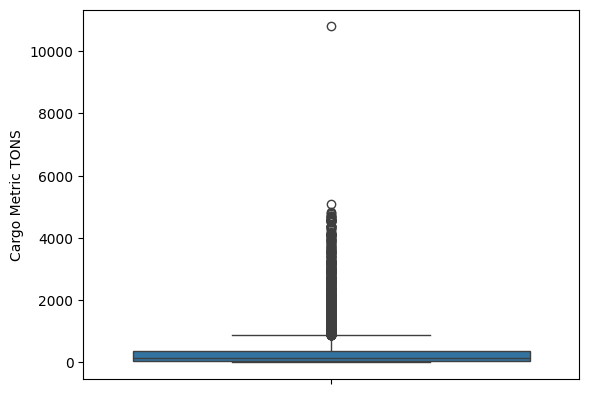

In [142]:
import seaborn as sns 

sns.boxplot(df_cargo['Cargo Metric TONS']) 

In [143]:
#printing the lower_quartile, median, upper_quartile, mean, and outliers 

print("the total amount of outliers are", (df_cargo['Cargo Metric TONS'] > 1000).sum()) 
percentage = (df_cargo['Cargo Metric TONS'] > 1000).sum() / len(df_cargo['Cargo Metric TONS']) * 100
print("the percentage of outliers are {:.3g}".format(percentage), "%") 
print("the average is", df_cargo['Cargo Metric TONS'].mean()) 
print("the median is", df_cargo['Cargo Metric TONS'].median())
print("the lower quartile is", df_cargo['Cargo Metric TONS'].quantile(.25))
print("the upper quartile is", df_cargo['Cargo Metric TONS'].quantile(.75)) 

the total amount of outliers are 918
the percentage of outliers are 6.16 %
the average is 317.2587346456667
the median is 155.4421428
the lower quartile is 41.5487394
the upper quartile is 379.2031362


#Task 1: Choose and defend the best metric for quantifying performance of a model

I would personally say that RMSE (Root Mean Squared Error) is the best metric for quantifying performance of this model. When comparing with MSE (Mean Squared Error) RMSE has the same units as the dependent variable making it easier to evalute the performance. Although MAE similarly gives the same unit as RMSE it fell down to the decision of how many outliers were contained within this dataset as well as how big of an outlier they were. From what I pulled there was approximately 6.16% outlier where some of them were considerbly big leaving me to decide upon RMSE to punish those larger values compared to MAE. It is also noteworthy to mention that the samll amount of outlier also ensured me that RMSE wouldn't be heavily affected by it where it would be more preferable that if the amount of outliers was higher then I would have used MAE to consider those outliers. 

In [144]:
#Task 2: Produce the best model you can for predicting the target (Cargo Metric Tons) using the train set data

#Linear Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#train set data is classified as df 
X_train = one_hot.drop('Cargo Metric TONS', axis = 1)
y_train = one_hot['Cargo Metric TONS']  

#train test split 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42) 

#linearRegression 
model = LinearRegression() 
model.fit(X_train, y_train) 

#predict and show RMSE 
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE) 
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 341.61799608407404
normalized RMSE: 0.07466687529178691


In [145]:
#neural network 

from sklearn.neural_network import MLPRegressor 

#redo the process to avoid any anomolies such as variables containing wrong value 
X_train = one_hot.drop('Cargo Metric TONS', axis = 1) 
y_train = one_hot['Cargo Metric TONS'] 

#train test split 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42) 

#neural network 
model = MLPRegressor() 
model.fit(X_train, y_train) 

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 477.28090712748997
normalized RMSE: 0.10431849135625965


In [146]:
#Ridge Regression 

from sklearn.linear_model import RidgeCV

X_train = one_hot.drop('Cargo Metric TONS', axis = 1)
y_train = one_hot['Cargo Metric TONS']

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Ridge regression
model = RidgeCV()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 341.6025224999223
normalized RMSE: 0.07466349325632209


In [147]:
#Lasso Regression 

from sklearn.linear_model import LassoCV 

X_train = one_hot.drop('Cargo Metric TONS', axis = 1)
y_train = one_hot['Cargo Metric TONS']

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Lasso Regression
model = LassoCV()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 389.122559719556
normalized RMSE: 0.08504986848716982


In [148]:
#Decision Tree Regression 

from sklearn.tree import DecisionTreeRegressor

X_train = one_hot.drop('Cargo Metric TONS', axis = 1)
y_train = one_hot['Cargo Metric TONS']

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 149.87287934765126
normalized RMSE: 0.03275746512229423


In [149]:
#Guassian Process Regression 

from sklearn.gaussian_process import GaussianProcessRegressor

X_train = one_hot.drop('Cargo Metric TONS', axis = 1)
y_train = one_hot['Cargo Metric TONS']

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Gaussian Process Regression
model = GaussianProcessRegressor()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 218.32517463678525
normalized RMSE: 0.0477189690664028


In [150]:
#Poisson Regression 

from sklearn.linear_model import PoissonRegressor 

X_train = one_hot.drop('Cargo Metric TONS', axis = 1) 
y_train = one_hot['Cargo Metric TONS'] 

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Poisson Regression
model = PoissonRegressor()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 488.0758468554745
normalized RMSE: 0.10667792331737158


c:\Users\go7jo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_linear_loss.py:290: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [151]:
#Passive Aggressive Regressor 

from sklearn.linear_model import PassiveAggressiveRegressor 

X_train = one_hot.drop('Cargo Metric TONS', axis = 1) 
y_train = one_hot['Cargo Metric TONS'] 

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#PassiveAgressive Regression
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 540.6598961580717
normalized RMSE: 0.11817113121806987


In [152]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

X_train = one_hot.drop('Cargo Metric TONS', axis = 1) 
y_train = one_hot['Cargo Metric TONS'] 

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#RandomForest Regression
model = RandomForestRegressor()
model.fit(X_train, y_train)

#predict and show RMSE
y_pred = model.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred, squared = False)
print("RMSE:", RMSE)
print("normalized RMSE:", RMSE / (y_val.max() - y_val.min()))

RMSE: 122.42975657469782
normalized RMSE: 0.02675926757651558


for this data challenge I decided to test the following models 

- Linear Regression 
- Neural Networking Regression 
- Ridge Regression 
- Lasso Regression 
- Decision Tree Regression 
- Guassian Process Regression 
- Poisson Regression 
- Passive Aggressive Regression
- Random Forest Regression

I have skipped over some regression such as Multioutput Regressior mainly due to lack of data where there wasn't exactly something I can put for estimator, the model also had to fit the context somewhat in which multioutput also didn't qualify for because even though there are overlapping variables for "X" all of them are unique (unique x -> one y value) making it not fitting to use a Regressor whose purpose is "predicting two or more numerical values given an input example" 

Using the metric system that I chose I printed the RMSE and the noramlzied RMSE values and will be ranking these models based on the noramlized RMSE values 
while noting that normalized RMSE is between 0 and 1 where the closer to 0 the more accurately the model predicts 

From best model to worst 
- Random Forest Regressor (0.02675926757651558) 
- Decision Tree Regression (0.03275746512229423) 
- Guassian Process Regression (0.0477189690664028) 
- Ridge Regression (0.07466349325632209) 
- Linear Regression (0.07466687529178691)
- Lasso Regression (0.08504986848716982) 
- Neural Networking Regression (0.10431849135625965) 
- Poisson Regression (0.10667792331737158) 
- Passive Agressive Regression (0.11817113121806987) 

given these results the best model to use is Random Forest Regressor 

In [153]:
#Task 3: Using the best model, generate predictions for the target on the test set.
# row: Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type

from sklearn.ensemble import RandomForestRegressor

test_df = pd.read_csv('Cargo Volume - Test.csv') 

#to produce similar result I'll be doing the same filtering process as the train dataset 
test_df = test_df.loc[test_df['Cargo Type Code'] == 'Cargo'] 
test_df.pop('Operating Airline IATA Code')
test_df.pop('Published Airline IATA Code')
test_df.pop('Cargo Type Code')

test_df

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Aircraft Type
1,202001,Nippon Cargo Airlines,Nippon Cargo Airlines,International,Asia,Deplaned,Freighter
2,201107,China Airlines,China Airlines,International,Asia,Enplaned,Passenger
3,201809,China Airlines,China Airlines,International,Asia,Deplaned,Passenger
4,200811,China Cargo Airlines,China Cargo Airlines,International,Asia,Enplaned,Freighter
7,200802,Asiana Airlines,Asiana Airlines,International,Asia,Enplaned,Freighter
...,...,...,...,...,...,...,...
6797,201510,Delta Air Lines,Delta Air Lines,Domestic,US,Deplaned,Passenger
6798,202006,SkyWest Airlines,Alaska Airlines,Domestic,US,Deplaned,Passenger
6801,201811,Finnair,Finnair,International,Europe,Enplaned,Passenger
6803,201910,British Airways,British Airways,International,Europe,Enplaned,Passenger


In [154]:
#one hot encoding
#note: since test dataset doesn't contain column of 'Cargo Metric TONS' this will be similar to X_train 
one_hot_test = pd.get_dummies(test_df, columns=['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Cargo Aircraft Type'], dtype='float') 

#since one_hot_test and one_hot aren't the same size, we need to add the missing columns to one_hot_test 
#all columns that aren't in one_hot_test 
missing_cols = set(one_hot.columns) - set(one_hot_test.columns) 

#missing_cols 
""""
{'Cargo Metric TONS',
 'Operating Airline_Air Canada Jazz',
 'Operating Airline_Air Italy S.P.A',
 'Operating Airline_Focus Air',
 'Operating Airline_Mesa Airlines',
 'Operating Airline_Republic Airlines',
 'Operating Airline_Virgin America',
 'Published Airline_Air Italy S.P.A',
 'Published Airline_Focus Air',
 'Published Airline_Republic Airlines',
 'Published Airline_Virgin America'}
"""

#since we don't need Cargo Metric Tons we just have to add the rest of the missing columns 
missing_cols.remove('Cargo Metric TONS')
for col in missing_cols: 
    one_hot_test[col] = 0 

#check if the columns are the same (should return only Cargo Metric TONS)
print(set(one_hot.columns) - set(one_hot_test.columns)) 

missing_cols2 = set(one_hot_test.columns) - set(one_hot.columns)
""""
{'Operating Airline_E.A.G.L.E.', 'Published Airline_E.A.G.L.E.'}
"""
#drop the columns that trained on 
one_hot_test.drop(missing_cols2, axis = 1, inplace = True) 
#check if the columns are the same (should return empty set) 
print(set(one_hot_test.columns) - set(one_hot.columns))

#reorder the columns to match the order of the train dataset
one_hot_copy = one_hot.copy() 
one_hot_copy.drop('Cargo Metric TONS', axis = 1, inplace = True)  
one_hot_test = one_hot_test[one_hot_copy.columns]

{'Cargo Metric TONS'}
set()


In [155]:
#redoing the process to avoid any anomolies such as variables containing wrong value
#one_hot is the train dataset (reminder to self) 
X_train = one_hot.drop('Cargo Metric TONS', axis = 1) 
y_train = one_hot['Cargo Metric TONS'] 

#train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#RandomForest Regression
model = RandomForestRegressor()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(one_hot_test)
y_pred 

array([149.32440785, 187.00183001, 228.88340294, ...,  19.03574585,
       222.84212681, 746.26838095])

In [156]:
#dc1.csv = a CSV file with your model’s predictions for the target (Cargo Metric Tons) given the features in the test set. 

#he file should have a header row (“Cargo Metric TONS”)
results = pd.DataFrame({'Cargo Metric TONS': y_pred}) 

results.to_csv('dc1.csv', index = False)